# ATAC-seq Pipeline
## Quick-Start Guide
This is a quick start guide to ATAC-seq pipeline. The pipeline is structures as a python library that can be imported with: 

In [675]:
import ATACseqPipeline
import importlib
importlib.reload(ATACseqPipeline)

<module 'ATACseqPipeline' from '/gpfs/group/home/snagaraja/ATACseqPipeline/core/ATACseqPipeline.py'>

In [676]:
print("hi")

hi


The sample sheet must be configured as a tab-delimeted file. Must contain the following columns: SampleName (replicates of the same sample should still have unique names. rule of thumb: give a unique name for every single fastq R1R2 pair here.), Read1 (Path to read 1 of FASTQ file), Read2 (Path to read 2 of FASTQ file), Status (sample name. Replicates must have the same status), C/T (is this sample a control or treatment).

The Pipeline object allows the user to set up an instance of the custom pipeline. It can be configured using a sample sheet as shown below. Note that setting dry_run=True at the time of pipeline creation will result in shell scripts to be created, but not submitted through SLURM. 

In [677]:
myexp = ATACseqPipeline.Pipeline(data_path='/gpfs/home/snagaraja/ATACseqPipeline/data', dry_run=False, app_path='/gpfs/home/snagaraja/ATACseqPipeline/core')
myexp.from_ssheet(ssheet_path='/gpfs/home/snagaraja/ATACseqPipeline/data/exp122_ssheet.txt')

/gpfs/group/home/snagaraja/ATACseqPipeline/core


In [678]:
import pandas as pd 
sampsheet = pd.read_csv('/gpfs/home/snagaraja/ATACseqPipeline/data/exp122_ssheet.txt', sep='\t')
print(sampsheet)

   SampleName                                              Read1  \
0     shCD4_1  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
1     shCD4_2  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
2      shCD19  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
3  shChd7.1_1  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
4  shChd7.1_2  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
5  shChd7.2_1  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
6  shChd7.2_2  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
7  shChd7.3_1  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   
8  shChd7.3_2  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...   

                                               Read2    Status C/T  
0  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...     shCD4   C  
1  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...     shCD4   C  
2  /gpfs/home/snagaraja/ATACseqPipeline/data/Exp1...    shCD19   C  
3  /gpfs/home/snagaraja/ATACseqPipeline/dat

Now uncomment each of these lines of code and hit play to run them. You should be able to monitor your jobs by using `squeue -u username`. As of right now, you need to run a step, and only run the next step once the previous one is complete. Future versions will run all job automagically. 

In [679]:
myexp.configure_envs()  

In [680]:
myexp.align_fastqs(genome_path='/gpfs/group/pipkin/tvenable/MusRef/MouseRefseq39_bowtie')

In [681]:
myexp.remove_mito()

In [682]:
myexp.remove_duplicates()

In [683]:
myexp.call_peaks()

In [684]:
myexp.get_stats()

In [685]:
myexp.filter_blacklist('/gpfs/home/snagaraja/ATACseqPipeline/refs/blacklist.bed')

In [686]:
myexp.get_insert_sizes()

In [687]:
myexp.plot_insert_sizes()

In [688]:
myexp.merge_peaks()

In [689]:
myexp.peak_counts()

In [690]:
myexp.optimize_p_value_macs(start=0.01, end=0.5, num=100)

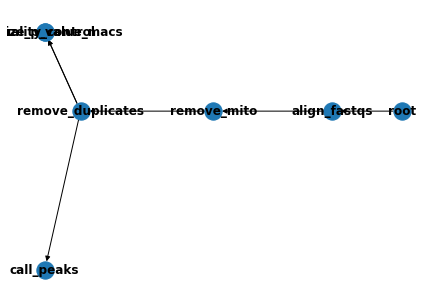

In [691]:
myexp.submit_dag()